# Heart Disease Prediction Using Random Forest

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The dataset is publically available on the Kaggle website (https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression), and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

In [3]:
#importing dataset
df=pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


The dataset contains demographic,behavioral and medical status of the patient.

The target column is TENYEARCHD which represents whether the patiesnt has developed heart disease in 10 years.

In [4]:
#general inforamtion on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
#handling missing values
df=df.dropna()

In [10]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [11]:
#statistical analysis
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


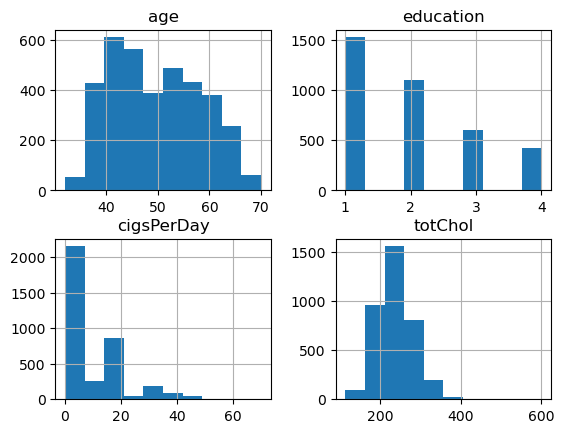

In [26]:
df[['age','education','cigsPerDay','totChol']].hist();
#plt.figure(figsize=(50,50));

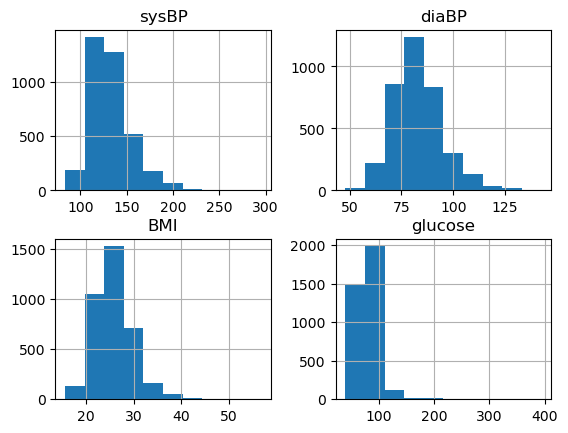

In [27]:
df[['sysBP','diaBP','BMI','glucose']].hist();

In [31]:
df['male'].value_counts(normalize=True)

0    0.556346
1    0.443654
Name: male, dtype: float64

In [32]:
df['currentSmoker'].value_counts(normalize=True)

0    0.510941
1    0.489059
Name: currentSmoker, dtype: float64

In [33]:
df['BPMeds'].value_counts(normalize=True)

0.0    0.969639
1.0    0.030361
Name: BPMeds, dtype: float64

In [34]:
df['prevalentStroke'].value_counts(normalize=True)

0    0.994256
1    0.005744
Name: prevalentStroke, dtype: float64

In [35]:
df['diabetes'].value_counts(normalize=True)

0    0.972921
1    0.027079
Name: diabetes, dtype: float64

**Key Findings:**

    1.Most number of patients are between the ages of 40-50 , followed by 50+ .
    2.Close to 50% of patients(48.9%) are current smokers who smokes between 0-20 cigerattes per day.
    3.Majority of Patients has cholestrol above 200.
    4.Average BMI of the patient is 25.
    5.More than 95% of the patients are not diabetic(97%) , not had stroke (99%) and not on BP medication (96%).
    6.55% of the patients in the dataset are females.

## Random Forest

In [39]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [45]:
#identifying data 
x=np.asarray(df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']])
y=np.asarray(df['TenYearCHD'])

In [47]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [59]:
#modeling
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_features='sqrt')

In [60]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features='sqrt')

In [61]:
#prediction
y_hat=model.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [69]:
confusion_matrix(y_test,y_hat)

array([[617,   6],
       [104,   5]], dtype=int64)

In [56]:
accuracy_score(y_test,y_hat)

0.8510928961748634

The accuracy of our model is 85% .

## Test case

Lets consider a imaginary patient A with characteristics 'male=0', 'age'=49, 'education'=2, 'currentSmoker'=1, 'cigsPerDay'=9, 'BPMeds'=0,'prevalentStroke'=0, 'prevalentHyp'=0, 'diabetes'=1, 'totChol'=236, 'sysBP'=132,'diaBP=82', 'BMI'=25, 'heartRate'=75, 'glucose'=82 and predict his health status.

In [71]:
A=[[0,49,2,1,9,0,0,0,1,236,132,82,25,75,82]]

In [73]:
y_pred=model.predict(A)
y_pred

array([0], dtype=int64)

Thus according to our model , patient A will not develop heart diseases in 10 years.